In [1]:
import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical


def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("data/fashion/train-labels-idx1-ubyte.gz")

#Y daten werden auf 1 oder null gesetz 
#y_train = y_train == 0 

X_test = open_images("data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("data/fashion/t10k-labels-idx1-ubyte.gz")


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
model = Sequential()


model.add(Dense(100, activation="sigmoid", input_shape=(784,)))

#10 = bestimmung der ausgänge
model.add(Dense(10, activation="sigmoid"))

#loss = binary_crossentrop 1 / 0 & categorical_crossentropy mehree ausgänge (katoegorien vorhersagen)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 1.6640 - accuracy: 0.4970
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.2027 - accuracy: 0.6828
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 1.0490 - accuracy: 0.7169
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9524 - accuracy: 0.7344
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.8846 - accuracy: 0.7490
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.8323 - accuracy: 0.7597
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.7906 - accuracy: 0.7674
Epoch 8/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7570 - accuracy: 0.7757
Epoch 9/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7279 - accuracy: 0.7812
Epoch 10/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7033 - accuracy: 0.7876


In [5]:
#genauigkeit in keras
#test mit den test daten
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 0s 613us/step - loss: 0.7196 - accuracy: 0.7753


[0.719635546207428, 0.7753000259399414]

In [6]:
# Vorher: 
#   ja  / nein
#   10% / 90%
# => NEIN weniger prozente da die genauigkeit anderst definiert wird.

#Jetzt:
#   T-Shirt / Hose / ....

In [7]:
#müssen in echte werte umgewnadelt werden.
model.predict(X_test.reshape(-1, 784))

array([[0.35118157, 0.21522012, 0.2752686 , ..., 0.9121396 , 0.668026  ,
        0.9483706 ],
       [0.5899955 , 0.18533307, 0.9611976 , ..., 0.28020698, 0.4413847 ,
        0.2356945 ],
       [0.50708157, 0.98997706, 0.16955829, ..., 0.22797605, 0.30211294,
        0.38016737],
       ...,
       [0.6594864 , 0.21119815, 0.26518375, ..., 0.11581826, 0.889063  ,
        0.39010942],
       [0.3808787 , 0.98505974, 0.21231493, ..., 0.2908606 , 0.15985194,
        0.29141486],
       [0.08253372, 0.21889386, 0.37864017, ..., 0.95841   , 0.772576  ,
        0.676528  ]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


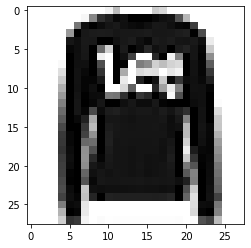

In [8]:
%matplotlib inline 

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [9]:
pred = model.predict(X_test.reshape(-1, 784))
# suche im bild die größte warscheinlichket

np.argmax(pred[1])

2

In [14]:
#erstellen der confusion matrix
#axis = dimensionen 1 = (zeilenweise berechnen)

np.argmax(pred, axis=1)


array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [25]:
import pandas as pd

#daten müssen aufbereitet werden alle daten in eine variable gesetzt
ytrue = pd.Series(np.argmax(y_test, axis= 1), name = "actual")
ypred = pd.Series(np.argmax(pred, axis= 1), name = "prediciton")

In [26]:
print(ytrue)
#funktion der confusion matrix bracuht eine pandas series

0       9
1       2
2       1
3       1
4       6
       ..
9995    9
9996    1
9997    8
9998    1
9999    5
Name: actual, Length: 10000, dtype: int64


In [28]:
#confusion matrix
pd.crosstab(ytrue, ypred)

prediciton,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,788,8,16,88,14,2,61,0,22,1
1,8,922,11,44,11,0,2,0,2,0
2,23,1,626,11,232,0,88,0,18,1
3,37,16,6,840,52,0,44,0,5,0
4,2,5,141,49,723,0,71,0,8,1
5,2,1,0,3,0,766,3,128,15,82
6,225,4,145,54,182,2,353,0,35,0
7,0,0,0,0,0,38,0,879,2,81
8,1,3,19,10,4,12,16,8,925,2
